In [111]:
# Exploratory Analysis - Embrapa Viticulture Dataset

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Configs
sns.set(style="whitegrid")
ROOT = Path().resolve().parent  # raiz do projeto
DATA_DIR = ROOT / "data"

# Helper to load CSV
def load_csv(filename):
    path = os.path.join(DATA_DIR, filename)
    df = pd.read_csv(path)
    print(f"✅ {filename}: {df.shape[0]} rows × {df.shape[1]} cols")
    return df

# Load datasets
df_prod = load_csv("production.csv")
df_proc = load_csv("processing.csv")
df_com = load_csv("commercialization.csv")
df_exp = load_csv("exportation.csv")
df_imp = load_csv("importation.csv")


✅ production.csv: 2754 rows × 4 cols
✅ processing.csv: 11448 rows × 5 cols
✅ commercialization.csv: 3348 rows × 4 cols
✅ exportation.csv: 27702 rows × 5 cols
✅ importation.csv: 10800 rows × 5 cols


In [112]:
df_prod.head()

,Category,Product,Quantity (L.),Year
0,VINHO DE MESA,Total,217208604.0,1970
1,VINHO DE MESA,Tinto,174224052.0,1970
2,VINHO DE MESA,Branco,748400.0,1970
3,VINHO DE MESA,Rosado,42236152.0,1970
4,VINHO FINO DE MESA (VINIFERA),Total,23899346.0,1970


In [113]:
# Total production by category and year
# This chart will show the annual production stacked by category (such as "Wine Grapes", "Table Grapes", etc.) as per actual data.
import plotly.graph_objects as go

df_prod_grouped = (
    df_prod.groupby(["Year", "Category"])["Quantity (L.)"]
    .sum()
    .unstack()
)

# Build stacked bar chart
fig = go.Figure()

for category in df_prod_grouped.columns:
    fig.add_trace(go.Bar(
        x=df_prod_grouped.index,
        y=df_prod_grouped[category],
        name=category
    ))

# Layout customization
fig.update_layout(
    barmode="stack",
    title="Grape Production by Category (Liters)",
    xaxis_title="Year",
    yaxis_title="Quantity (L)",
    width=1000,
    height=500,
    template="plotly_white",
    xaxis=dict(type="category", tickangle=-45),
    legend_title="Category",
    margin=dict(t=50, r=60, b=80, l=60),
)

fig.show()

In [114]:
df_proc.head()

,GrapeType,Category,Cultivar,Quantity (kg),Year
0,Viníferas,TINTAS,Total,10448228.0,1970
1,Viníferas,TINTAS,Alicante Bouschet,NaN,1970
2,Viníferas,TINTAS,Ancelota,NaN,1970
3,Viníferas,TINTAS,Aramon,NaN,1970
4,Viníferas,TINTAS,Alfrocheiro,NaN,1970


In [115]:
# Grouping by year and category
# This graph allows you to analyze how grapes have been processed over the years, differentiating between the two main destinations: juice production and wine production.
import plotly.graph_objects as go

df_proc_grouped = (
    df_proc.groupby(["Year", "Category", "GrapeType"])["Quantity (kg)"]
    .sum()
    .reset_index()
)

pivot_df = df_proc_grouped.pivot_table(
    index="Year",
    columns=["Category", "GrapeType"],
    values="Quantity (kg)",
    aggfunc="sum"
)

# Create figure
fig = go.Figure()

# Add each line to the figure
for (category, grape_type) in pivot_df.columns:
    fig.add_trace(go.Scatter(
        x=pivot_df.index,
        y=pivot_df[(category, grape_type)],
        mode='lines+markers',
        name=f"{category} - {grape_type}"
    ))

# Customize layout
fig.update_layout(
    title="Grape Processing by Category and Grape Type",
    xaxis_title="Year",
    yaxis_title="Quantity Processed (kg)",
    width=1000,
    height=500,
    legend_title="Category - Grape Type",
    template="plotly_white",
    xaxis=dict(dtick=1),
    margin=dict(t=50, r=150, b=50, l=60)
)

fig.show()


In [116]:
df_exp.head()
df_imp.head()

,Type,Country,Quantity (kg),Value (US$),Year
0,Vinhos de mesa,Africa do Sul,NaN,NaN,1970
1,Vinhos de mesa,Alemanha,52297.0,30498.0,1970
2,Vinhos de mesa,Argélia,NaN,NaN,1970
3,Vinhos de mesa,Arábia Saudita,NaN,NaN,1970
4,Vinhos de mesa,Argentina,19525.0,12260.0,1970


In [117]:
import plotly.graph_objects as go

# Comparison of Export and Import of Grapes over the Years
# Group export and import data
export_series = df_exp.groupby("Year")["Quantity (kg)"].sum()
import_series = df_imp.groupby("Year")["Quantity (kg)"].sum()

# Create interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=export_series.index,
    y=export_series.values,
    mode="lines+markers",
    name="Exportation",
    marker=dict(symbol="circle", size=8),
    line=dict(width=2)
))

fig.add_trace(go.Scatter(
    x=import_series.index,
    y=import_series.values,
    mode="lines+markers",
    name="Importation",
    marker=dict(symbol="x", size=8),
    line=dict(width=2, dash="dash")
))

# Customize layout
fig.update_layout(
    title="Export vs Import of Grapes (kg)",
    xaxis_title="Year",
    yaxis_title="Quantity (kg)",
    template="plotly_white",
    width=1000,
    height=500,
    xaxis=dict(type="category"),
    legend_title="Type",
    margin=dict(t=50, r=60, b=60, l=60)
)

fig.show()


In [118]:
df_com.head()

,Category,Product,Quantity (L.),Year
0,VINHO DE MESA,Total,98327606.0,1970
1,VINHO DE MESA,Tinto,83300735.0,1970
2,VINHO DE MESA,Rosado,107681.0,1970
3,VINHO DE MESA,Branco,14919190.0,1970
4,VINHO FINO DE MESA,Total,4430629.0,1970


In [119]:
import plotly.express as px

# Evolution of the marketing of products such as juice, table wine, fine wine and others.
# Group and pivot data
df_com_grouped = (
    df_com.groupby(["Year", "Product"])["Quantity (L.)"]
    .sum()
    .reset_index()
)

# Create interactive line chart
fig = px.line(
    df_com_grouped,
    x="Year",
    y="Quantity (L.)",
    color="Product",
    markers=True,
    title="Commercialization of Grape Derivatives",
    labels={
        "Year": "Year",
        "Quantity (L.)": "Volume (Liters)",
        "Product": "Product Type"
    }
)

# Customize layout
fig.update_layout(
    template="plotly_white",
    width=1000,
    height=500,
    legend_title="Product",
    xaxis=dict(type="category"),
    margin=dict(t=50, r=60, b=60, l=60)
)

fig.show()


In [120]:
# --- Unified Annual Summary for Multivariate Analysis ---

# Aggregate each dataset by year
prod_yearly = df_prod.groupby("Year")["Quantity (L.)"].sum().rename("Total_Production_Liters")
proc_yearly = df_proc.groupby("Year")["Quantity (kg)"].sum().rename("Total_Processed_kg")
com_yearly = df_com.groupby("Year")["Quantity (L.)"].sum().rename("Total_Commercialized_Liters")
exp_yearly = df_exp.groupby("Year")["Quantity (kg)"].sum().rename("Total_Exported_kg")
imp_yearly = df_imp.groupby("Year")["Quantity (kg)"].sum().rename("Total_Imported_kg")

# Merge all into a single DataFrame
df_yearly = pd.concat([prod_yearly, proc_yearly, com_yearly, exp_yearly, imp_yearly], axis=1)

# Fill any missing years with 0 (important for complete time series)
df_yearly = df_yearly.fillna(0).astype(int)

# Show result
print("✅ Unified dataset (yearly):")
display(df_yearly.head())


✅ Unified dataset (yearly):


,Total_Production_Liters,Total_Processed_kg,Total_Commercialized_Liters,Total_Exported_kg,Total_Imported_kg
Year,,,,,
1970,512740100,632952051,265694161,141592,9445691
1971,386855770,455652457,300842084,291096,8780914
1972,367712034,434265394,320672606,504842,9982090
1973,314793348,365032211,329406346,1120589,10466782
1974,546848806,683573843,277835670,835988,10820833


In [121]:
import plotly.graph_objects as go

fig = go.Figure()
for column in df_yearly.columns:
    fig.add_trace(go.Scatter(
        x=df_yearly.index,
        y=df_yearly[column],
        mode="lines+markers",
        name=column.replace("_", " "),
        marker=dict(size=8)
    ))

fig.update_layout(
    title="Multivariate Summary by Year",
    xaxis_title="Year",
    yaxis_title="Quantity",
    width=1100,
    height=500,
    template="plotly_white",
    xaxis=dict(dtick=1),
    legend_title="Metric",
    margin=dict(t=50, r=80, b=60, l=60)
)
fig.show()


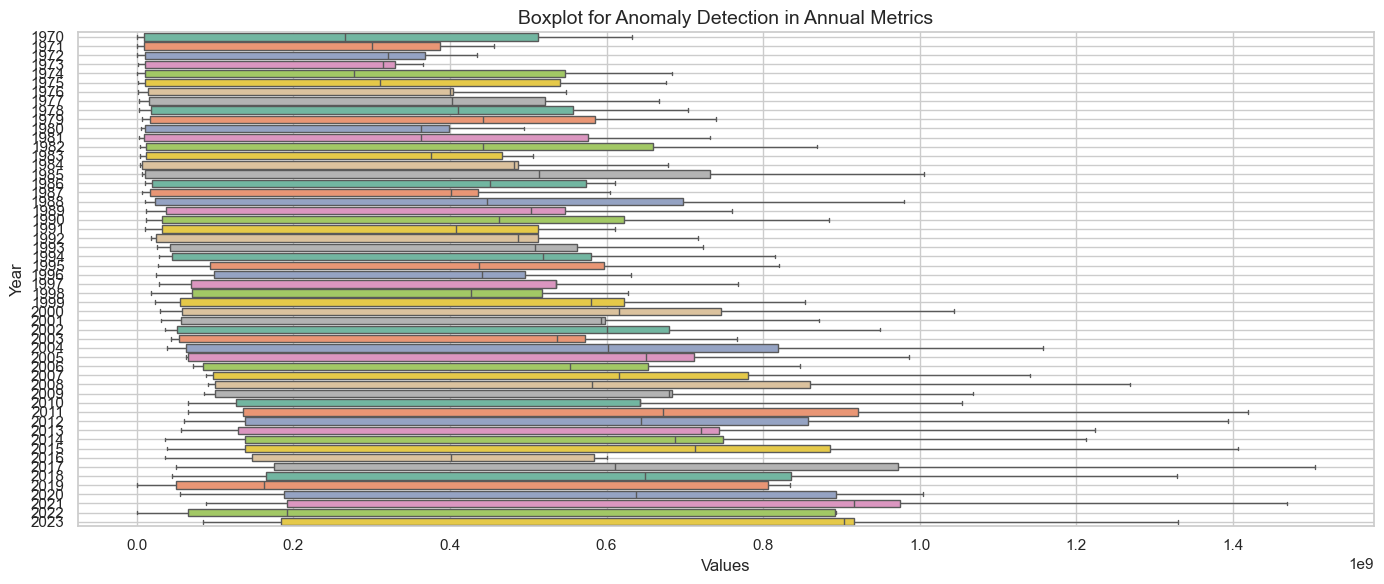

In [122]:
# --- Anomaly Detection via Boxplots per Metric ---
# This chart allows you to:
# * Visualize extreme values ​​(points outside the box);
# * Identify more volatile metrics (larger boxes);
# * Raise specific hypotheses, such as: A year of crop failure;High international demand (peak export);Low production and high sales.
import matplotlib.pyplot as plt

# Transpose to plot a boxplot by variable (column)
df_yearly_T = df_yearly.T

# Plot Settings
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_yearly_T, orient="h", palette="Set2")

plt.title("Boxplot for Anomaly Detection in Annual Metrics", fontsize=14)
plt.xlabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()


,Total_Production_Liters,Total_Processed_kg,Total_Commercialized_Liters,Total_Exported_kg,Total_Imported_kg
Year,,,,,
1970,512740100,632952051,265694161,141592,9445691
1971,386855770,455652457,300842084,291096,8780914
1972,367712034,434265394,320672606,504842,9982090
1973,314793348,365032211,329406346,1120589,10466782
1974,546848806,683573843,277835670,835988,10820833


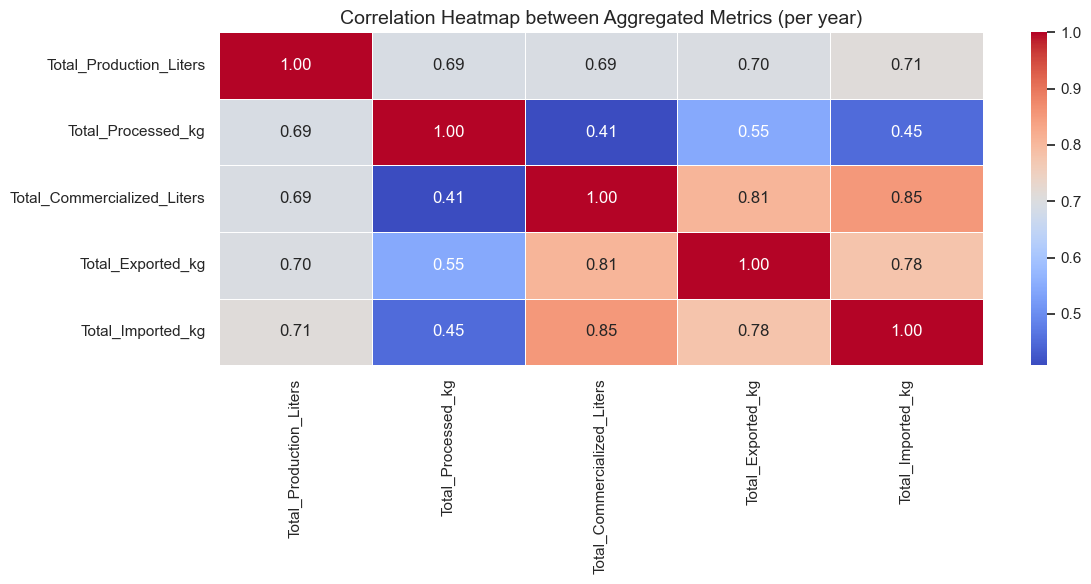

In [123]:
# --- Correlation Heatmap ---
# Code to calculate and visualize correlation between metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Check the consolidated DataFrame
display(df_yearly.head())

# Correlation Matrix
corr_matrix = df_yearly.corr()

# Heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap between Aggregated Metrics (per year)", fontsize=14)
plt.tight_layout()
plt.show()

# This heatmap will highlight:
# 🔴 Strong positive correlation: close to +1 (e.g.: juice production and marketing);
# 🔵 Strong negative correlation: close to -1 (e.g.: increased imports vs. local production);
# ⚪ Weak or null correlation: little or no direct relationship.

In [124]:
# Filters only juice in the bases
prod_suco = df_prod[df_prod["Product"].str.lower().str.contains("suco")]
com_suco = df_com[df_com["Product"].str.lower().str.contains("suco")]

# Group by year
prod_suco_yearly = prod_suco.groupby("Year")["Quantity (L.)"].sum()
com_suco_yearly = com_suco.groupby("Year")["Quantity (L.)"].sum()

# Join into a single dataframe
df_suco_corr = pd.DataFrame({
    "production_suco": prod_suco_yearly,
    "commercial_suco": com_suco_yearly
}).dropna()  # remove years with missing data in one of the series

print("Suco correlation dataframe:")
print(df_suco_corr.head())


Suco correlation dataframe:
      production_suco  commercial_suco
Year                                  
1970        1097771.0              0.0
1971        2296654.0              0.0
1972        3509440.0              0.0
1973              0.0              0.0
1974              0.0              0.0


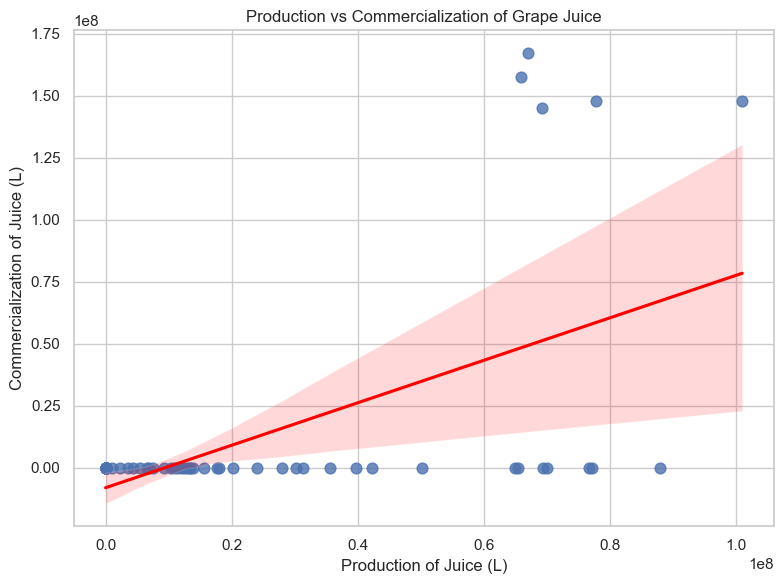

In [125]:
# Scatter Plots with Regression Line
# This helps visualize linear relationships between strongly correlated variables.

# Visualization of the linear relationship between juice production and marketing
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(
    x=df_suco_corr["production_suco"],
    y=df_suco_corr["commercial_suco"],
    line_kws={"color": "red"},
    scatter_kws={"s": 60}
)
plt.title("Production vs Commercialization of Grape Juice")
plt.xlabel("Production of Juice (L)")
plt.ylabel("Commercialization of Juice (L)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Production vs Exportation (Grape Juice)

# Filters only juice in the bases
prod_suco = df_prod[df_prod["Product"].str.lower().str.contains("suco")]
exp_suco = df_exp[df_exp["Type"].str.lower().str.contains("suco")]

# Group by year
prod_suco_yearly = prod_suco.groupby("Year")["Quantity (L.)"].sum()
exp_suco_yearly = exp_suco.groupby("Year")["Quantity (kg)"].sum()  # Assume-se 1 kg ≈ 1 L

# Join into a single dataframe
df_prod_exp = pd.DataFrame({
    "production_suco": prod_suco_yearly,
    "exportation_suco": exp_suco_yearly
}).dropna()  # remove years with missing data

# Visualization of the relationship between production and export
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(
    x=df_prod_exp["production_suco"],
    y=df_prod_exp["exportation_suco"],
    line_kws={"color": "green"},
    scatter_kws={"s": 60}
)
plt.title("Production vs Exportation of Grape Juice")
plt.xlabel("Juice Production (L)")
plt.ylabel("Juice Exportation (L)")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'production_juice'

<Figure size 800x600 with 0 Axes>

In [ ]:
# General Correlation between Indicators (same unit: Liters or kg)
# We will calculate the Pearson correlation only between columns that are in the same unit to maintain statistical coherence.

# Subset with columns of the same unit (liters ≈ kg)
df_corr_subset = df_yearly[
    ["Total_Production_Liters", "Total_Commercialized_Liters", "Total_Exported_kg", "Total_Imported_kg"]
]

# Pearson correlation matrix
corr_matrix = df_corr_subset.corr(method="pearson")

# Visualization with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"}
)
plt.title("Correlation between Production, Commercialization, Import & Export")
plt.tight_layout()
plt.show()

# This heatmap allows you to identify interesting relationships between macro variables such as:
# Whether production is more linked to marketing or export.
# Whether imports increase when production decreases, etc.

In [ ]:
# Linear Regression with Scikit-learn (Juice Production vs Marketing)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Data
X = df_suco_corr["production_suco"].values.reshape(-1, 1)
y = df_suco_corr["commercial_suco"].values

# Model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"🔍 R²: {r2:.3f}")
print(f"🔍 RMSE: {rmse:,.0f} Liters")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Real", color="blue", s=60)
plt.plot(X, y_pred, label="Predicted", color="red", linewidth=2)
plt.title("Linear Regression: Production vs Commercialization of Grape Juice")
plt.xlabel("Production of Juice (L)")
plt.ylabel("Commercialization of Juice (L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraction of annual data for each variable
processed_yearly = df_yearly["Total_Processed_kg"]
exported_yearly = df_yearly["Total_Exported_kg"]

# Join on a DataFrame
df_corr_proc_exp = pd.DataFrame({
    "processed_kg": processed_yearly,
    "exported_kg": exported_yearly
}).dropna()

# Visualization with regression
plt.figure(figsize=(8, 6))
sns.regplot(
    x=df_corr_proc_exp["processed_kg"],
    y=df_corr_proc_exp["exported_kg"],
    line_kws={"color": "green"},
    scatter_kws={"s": 60}
)
plt.title("Processed vs Exported Grape Volume")
plt.xlabel("Processed Volume (kg)")
plt.ylabel("Exported Volume (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Linear Regression Model – Processed vs Exported
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
X = df_corr_proc_exp[["processed_kg"]].values
y = df_corr_proc_exp["exported_kg"].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("✅ Linear Regression - Processed vs Exported")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plotting regression
plt.figure(figsize=(8, 6))
sns.regplot(x=X.flatten(), y=y, line_kws={"color": "green"}, scatter_kws={"s": 60})
plt.title("Linear Regression: Processed vs Exported")
plt.xlabel("Processed Volume (kg)")
plt.ylabel("Exported Volume (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Pearson correlation between these variables to understand which has the greatest predictive potential.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_yearly.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [ ]:
# Exclude own production from the input set to avoid data leakage
X = df_yearly.drop(columns=["Total_Production_Liters"])
y = df_yearly["Total_Production_Liters"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# Split data into training and testing (80/20)
X = df_yearly.drop(columns=["Total_Production_Liters"])
y = df_yearly["Total_Production_Liters"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Rating
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# Ensures the folder exists
import os
os.makedirs("notebooks", exist_ok=True)

# Export trained model
MODEL_PATH = "notebooks/model_production_prediction.pkl"
joblib.dump(model, MODEL_PATH)
print(f"💾 Model saved in: {MODEL_PATH}")